In [1]:
import numpy as np
import open3d as o3d
import os
import sys

# monkey patches visualization and provides helpers to load geometries
sys.path.append('..')
import open3d_tutorial as o3dtut
# change to True if you want to interact with the visualization windows
o3dtut.interactive = not "CI" in os.environ

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.
[download_utils.py] F:\WorkSpace\Project_Remote\open3d_learn\examples\test_data\open3d_downloads\RGBD\raycast_vtx_004.npy already exists, skipped.
[download_utils.py] F:\WorkSpace\Project_Remote\open3d_learn\examples\test_data\open3d_downloads\RGBD\normal_map.npy already exists, skipped.
[download_utils.py] F:\WorkSpace\Project_Remote\open3d_learn\examples\test_data\open3d_downloads\tests\bunnyData.pts already exists, skipped.
[download_utils.py] F:\WorkSpace\Project_Remote\open3d_learn\examples\test_data\open3d_downloads\tests\point_cloud_sample1.pts already exists, skipped.
[download_utils.py] F:\WorkSpace\Project_Remote\open3d_learn\examples\test_data\open3d_downloads\tests\point_cloud_sample2.pts already exists, skipped.
[download_utils.py] F:\WorkSpace\Project_Remote\open3d_learn\examples\test_data\open3d_downloads

# Half Edge Mesh

This tutorial outlines the following:
1. How to use `mesh_show_back_face` to render the backface of a mesh.
2. How to use `geometry.AxisAlignedBoundingBox` to crop a mesh. 
3. How to use `utility.Vector3dVector` to colorize boundary vertices of a mesh to red. 

## Render the backface of a Mesh

In order to render the backface of a mesh `visualization.draw_geometries()` is called with the flag `mesh_show_back_face` set to `True`.

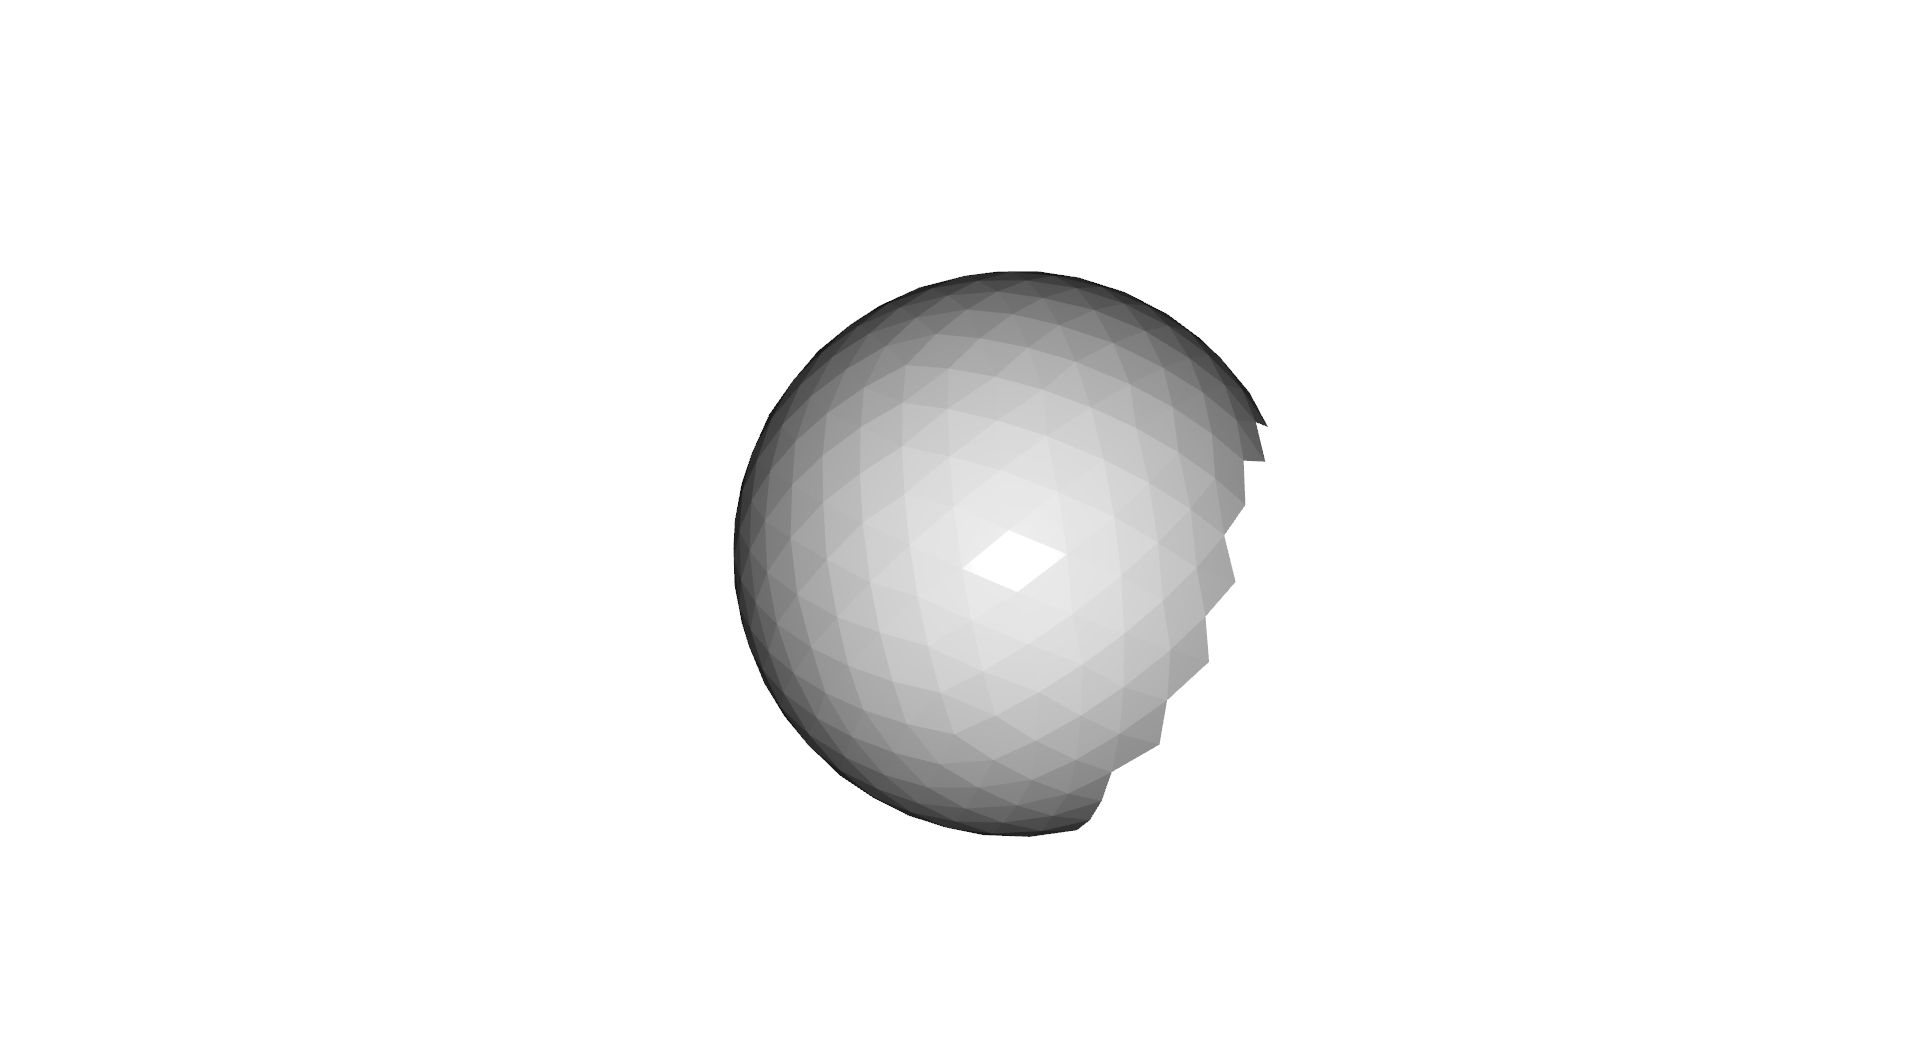

In [2]:
# Initialize a HalfEdgeTriangleMesh from TriangleMesh
mesh = o3d.io.read_triangle_mesh("../../test_data/sphere.ply")
bbox = o3d.geometry.AxisAlignedBoundingBox()
bbox.min_bound = [-1, -1, -1]
bbox.max_bound = [1, 0.6, 1]
mesh = mesh.crop(bbox)
het_mesh = o3d.geometry.HalfEdgeTriangleMesh.create_from_triangle_mesh(mesh)
o3d.visualization.draw_geometries([het_mesh], mesh_show_back_face=True)

## Cropping a Mesh

`geometry.AxisAlignedBoundingBox` is used to create an axis aligned box. The parameters `min_bound` and `max_bound` take an array of cartesian coordinates (x,y,z) and define the size of the bounding box. The bounds are set such that the y-axis of the sphere mesh is cut by a call to `crop`.

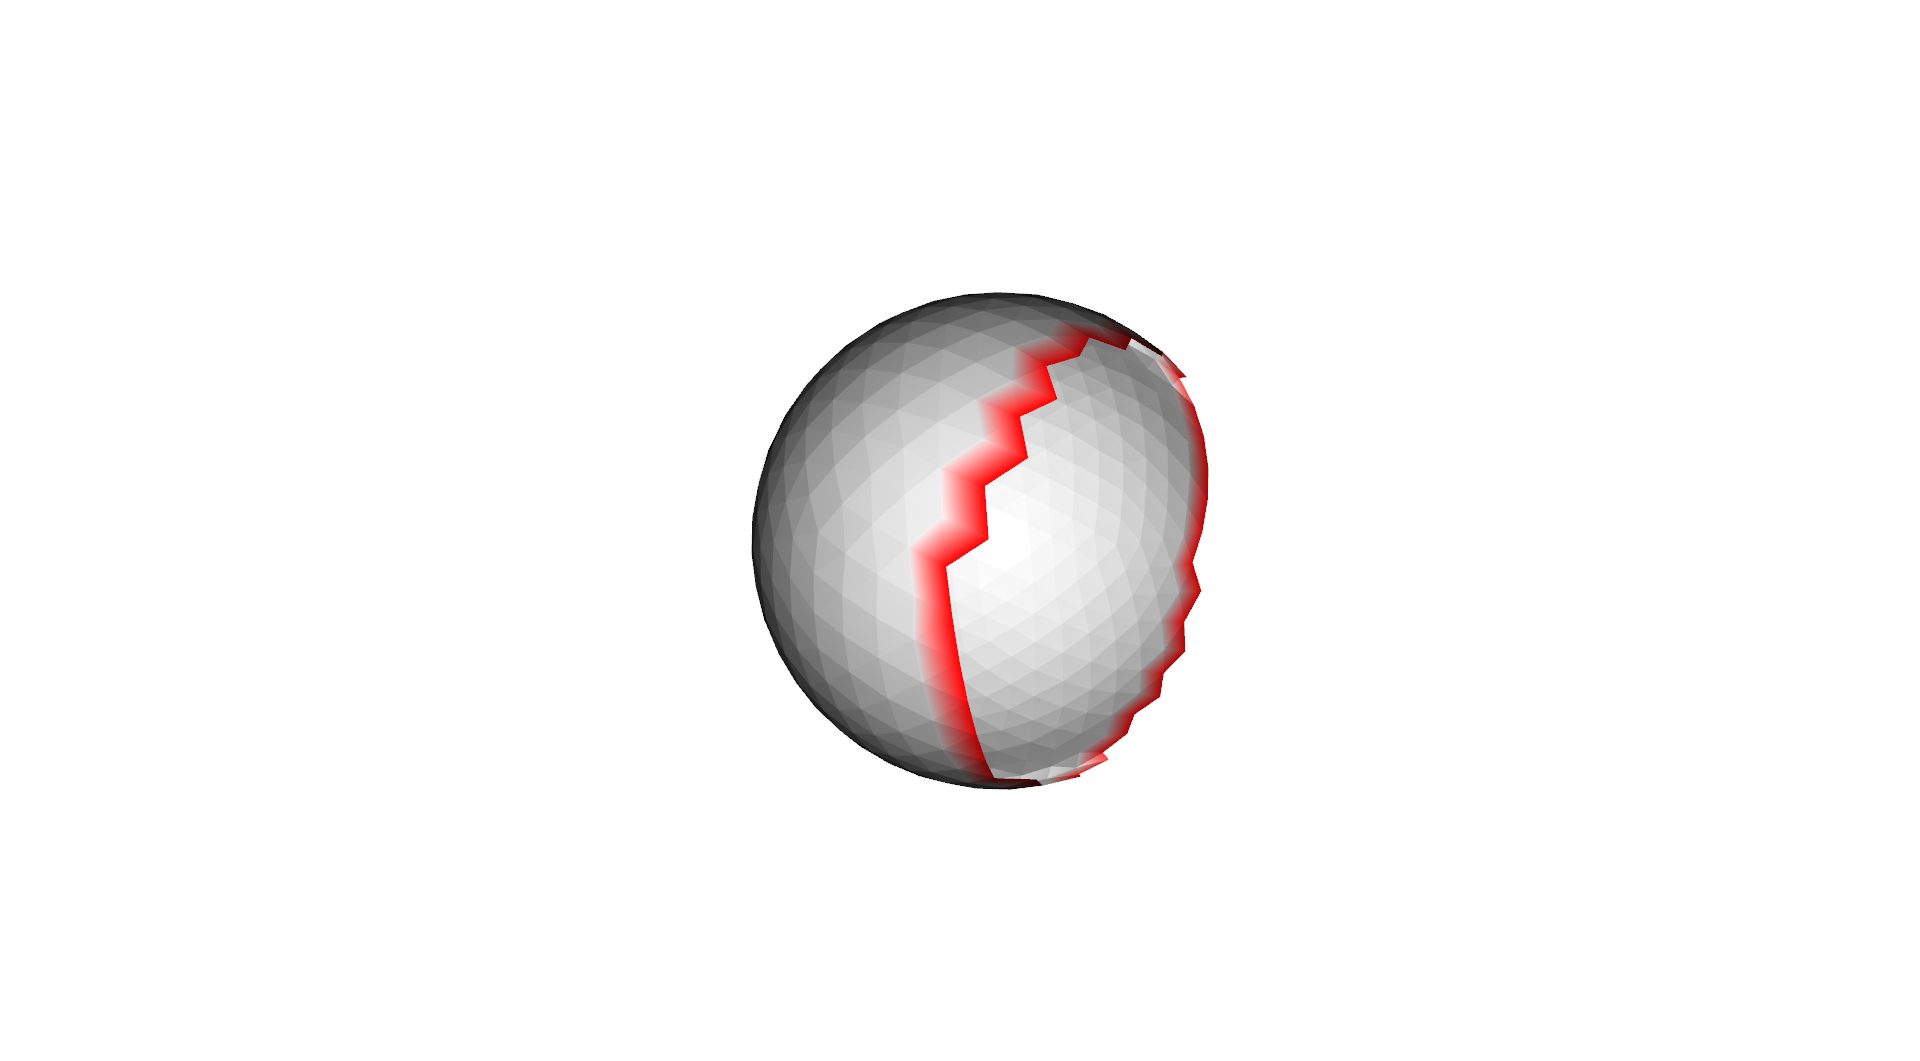

In [3]:
# Colorize boundary vertices to red
vertex_colors = 0.75 * np.ones((len(het_mesh.vertices), 3))
for boundary in het_mesh.get_boundaries():
    for vertex_id in boundary:
        vertex_colors[vertex_id] = [1, 0, 0]
het_mesh.vertex_colors = o3d.utility.Vector3dVector(vertex_colors)
o3d.visualization.draw_geometries([het_mesh], mesh_show_back_face=True)

## Colorize the Boundaries of a Mesh

A call to `geometry.TriangleMesh.get_boundaries` returns a vector of boundaries, where each boundary is a vector of vertices. Each vertex color is represented by an RBG array and `Vector3dVector` is used to convert `vertex_colors` of shape (n, 3) to Open3D format. Finally, the vertex colors are set on the mesh.